# Batch Ingestion for Single-Label Multiclass Classification

In this tutorial, we'll outline how to send prediction labels and actuals from multiclass models to Arize. Multiclass classification models are defined as a classification model with more than two classes. For a multiclass model, Single-Label indicates the output of the model can be assigned to only one class. 

##  Install and Import Dependencies

In [1]:
from arize.pandas.logger import Client, Schema
from arize.utils.types import ModelTypes, Environments

import pandas as pd
import datetime
import numpy as np


## Download and Display Data

In [2]:
file_url = "https://storage.googleapis.com/arize-assets/documentation-sample-data/data-ingestion/multiclass-classification-assets/single-label-multi-class-sample-data.parquet"
df = pd.read_parquet(file_url)
df.head()


,FIELD1,prediction_id,feature1,feature2,feature3,feature4,prediction_scores,actual_scores
0,0,57437c5d-0cd2-48bf-aa91-379302fd0fe4,40,96,42,88,"[{'class_name': 'first_class', 'score': 0.5044...","[{'class_name': 'first_class', 'score': 1.0}]"
1,1,518880f9-55d2-43af-87a1-77b89c8ffa05,79,90,34,22,"[{'class_name': 'first_class', 'score': 0.3506...","[{'class_name': 'business_class', 'score': 1.0}]"
2,2,355da8b0-8343-4be9-b9b9-72b8b4aafbe1,90,41,67,83,"[{'class_name': 'first_class', 'score': 0.0132...","[{'class_name': 'business_class', 'score': 1.0}]"
3,3,806ea4b9-3c6a-48ff-a092-d62886f31415,1,20,77,11,"[{'class_name': 'first_class', 'score': 0.8000...","[{'class_name': 'business_class', 'score': 1.0}]"
4,4,1696bef7-8da7-432a-9999-a6ddf44b3c01,56,75,56,13,"[{'class_name': 'first_class', 'score': 0.3092...","[{'class_name': 'economy_class', 'score': 1.0}]"


In [36]:
df.to_csv("example_data_from_arize.csv")


## Add Timestamps for Predictions

In [12]:
current_time = datetime.datetime.now().timestamp()

earlier_time = (
    datetime.datetime.now() - datetime.timedelta(days=30)
).timestamp()

optional_prediction_timestamps = np.linspace(
    earlier_time, current_time, num=df.shape[0]
)

df["prediction_ts"] = pd.Series(optional_prediction_timestamps.astype(int))
df["prediction_ts"].head()


0    1749146179
1    1749172361
2    1749198543
3    1749224725
4    1749250907
Name: prediction_ts, dtype: int64

## Create Arize Client

In [29]:
SPACE_ID = "U3BhY2U6MjE5NTE6SnVvTA=="  # update value here with your Space ID
API_KEY = "ak-45556310-b0c0-4f7d-a1c5-f9c51be86ffa-aDbJk-NTN5KVpgAu4oLVt7z9mbYrazux"  # update value here with your API key

arize_client = Client(space_id=SPACE_ID, api_key=API_KEY)

if SPACE_ID == "SPACE_ID" or API_KEY == "API_KEY":
    raise ValueError("❌ CHANGE SPACE_ID AND/OR API_KEY")
else:
    print(
        "✅ Import and Setup Arize Client Done! Now we can start using Arize!"
    )


✅ Import and Setup Arize Client Done! Now we can start using Arize!


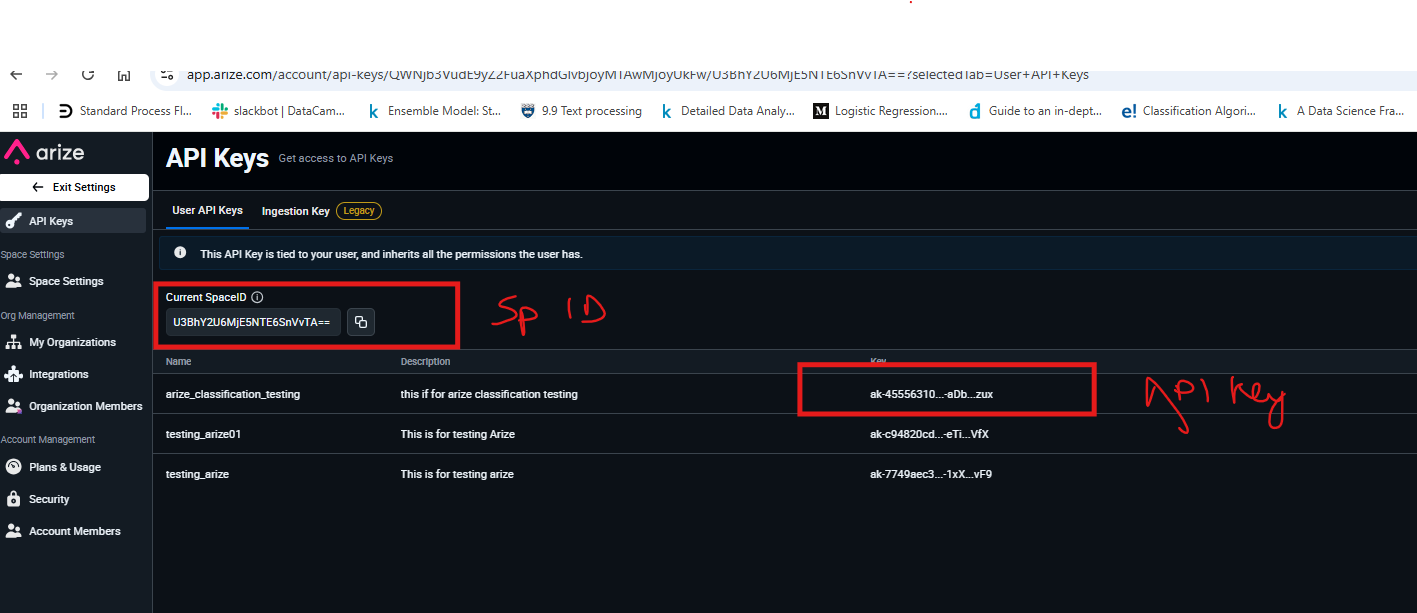

Multiple projects can have same SpaceID and API Key

## Schema

In [ ]:
schema = Schema(
    prediction_id_column_name="prediction_id",
    timestamp_column_name="prediction_ts",
    prediction_score_column_name="prediction_scores",
    feature_column_names=["feature1", "feature2", "feature3", "feature4"],
    actual_score_column_name="actual_scores",
)


## Checking the argument of schema

In [ ]:
help(Schema)


In [ ]:
response = arize_client.log(
    dataframe=df,
    model_id="multiclass-classification-single-label-batch-ingestion-tutorial",
    model_version="1.0",
    model_type=ModelTypes.MULTI_CLASS,
    environment=Environments.PRODUCTION,
    schema=schema,
)

if response.status_code == 200:
    print("✅ You have successfully logged production dataset to Arize")
else:
    print(
        f"Logging failed with response code {response.status_code}, {response.text}"
    )


  arize.utils.logging | INFO | Success! Check out your data at https://app.arize.com/organizations/QWNjb3VudE9yZ2FuaXphdGlvbjoyMTAwMjoyUkFw/spaces/U3BhY2U6MjE5NTE6SnVvTA==/models/modelName/multiclass-classification-single-label-batch-ingestion-tutorial?selectedTab=performance
✅ You have successfully logged production dataset to Arize


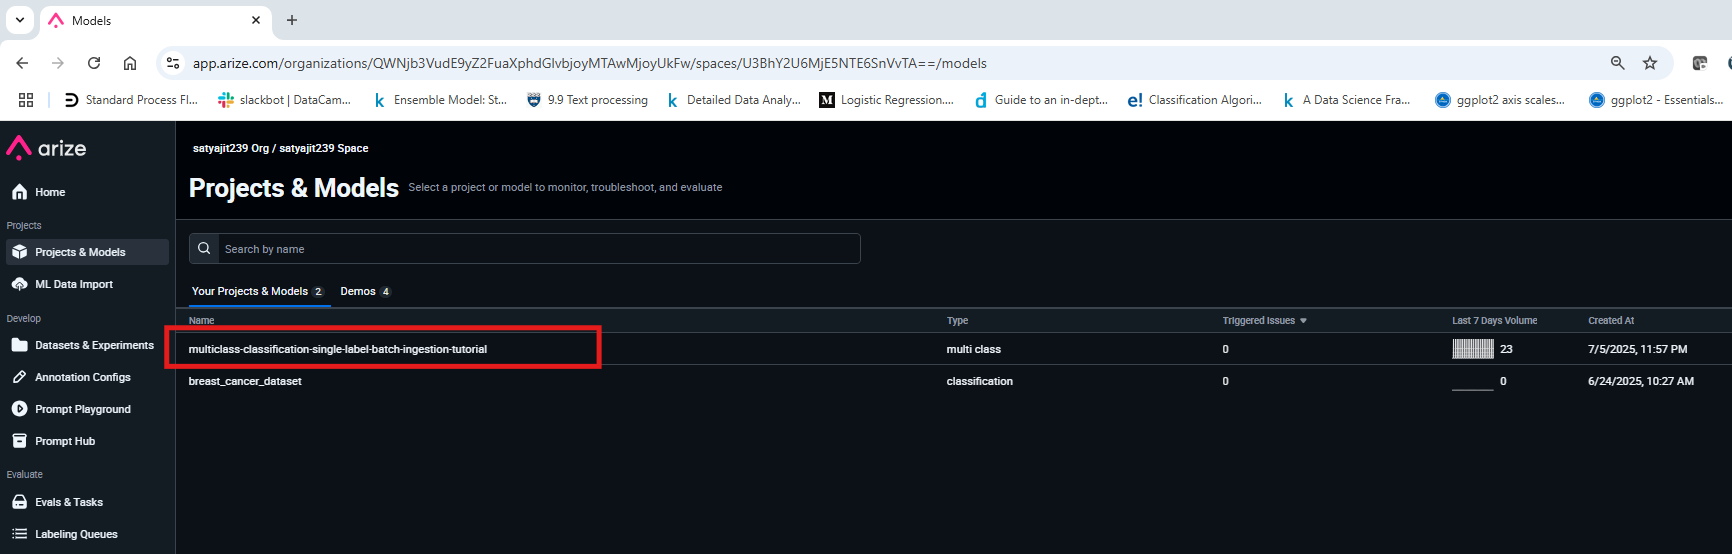

It takes between 1 to 10 min to generate the insights in the Arize